# Tucker Tensors

Tucker format is a decomposition of a tensor X as the product of a core tensor G and matrices (e.g., A,B,C) in each dimension. In other words, a tensor X is expressed as:

$
\mathcal{X} = \mathcal{G} \times_1 A \times_2 B \times_3 C
$

In MATLAB notation: `X=ttm(G,{A,B,C})`

In [2]:
import pyttb as ttb
import numpy as np

In [ ]:
# Upcoming ttensors will be generated with this same initialization.
def generate_sample_ttensor() -> ttb.ttensor:
    np.random.seed(0)
    core = ttb.tensor(np.random.rand(3, 2, 1), shape=(3, 2, 1))  # The core tensor.
    U = [
        np.random.rand(5, 3),
        np.random.rand(4, 2),
        np.random.rand(3, 1),
    ]  # The factor matrices.
    X = ttb.ttensor(core, U)  # Create the ttensor.

    return X

## Creating a ttensor with a tensor core

In [ ]:
X = generate_sample_ttensor()  # Create the ttensor.
X

## Alternate core formats: sptensor or tensor

In [ ]:
np.random.seed(0)
sptensor_core = ttb.sptenrand([3, 2, 1], nonzeros=3)  # Create a 3 x 2 x 1 sptensor.
U = [
    np.random.rand(5, 3),
    np.random.rand(4, 2),
    np.random.rand(3, 1),
]  # The factor matrices.
Y = ttb.ttensor(sptensor_core, U)  # Core is a sptensor.
Y

In [ ]:
dense_tensor = ttb.tensor(np.random.rand(3, 2, 1), (3, 2, 1))  # Core is a tensor.
U = [
    np.random.rand(5, 3),
    np.random.rand(4, 2),
    np.random.rand(3, 1),
]  # The factor matrices.
Y = ttb.ttensor(dense_tensor, U)  # Create the ttensor.
Y

## Creating a one-dimensional ttensor

In [ ]:
np.random.seed(0)
dense_tensor = ttb.tensor(2 * np.random.rand(2, 1), (2,))  # Core tensor.
Z = ttb.ttensor(dense_tensor, [np.random.rand(4, 2)])  # One-dimensional ttensor.
Z

## Constituent parts of a ttensor

In [ ]:
X = generate_sample_ttensor()  # Create the ttensor.
X.core  # Core tensor.

In [ ]:
X.factor_matrices  # List of matrices.

## Creating a ttensor from its constituent parts

In [ ]:
X = generate_sample_ttensor()  # Create the ttensor.
Y = ttb.ttensor(X.core, X.factor_matrices)  # Recreate a ttensor from its parts.
Y

## Creating an empty ttensor

In [ ]:
X = ttb.ttensor()  # Empty ttensor.
X

## Use full or to_tensor to convert a ttensor to a tensor

In [ ]:
X = generate_sample_ttensor()  # Create a ttensor.
X

In [ ]:
X.full()  # Converts to a tensor.

In [ ]:
X.to_tensor()  # Also converts to a tensor.

## Use reconstruct to compute part of a full tensor

In [ ]:
X = generate_sample_ttensor()  # Create a ttensor.
X.reconstruct(1, 2)  # Extract first front slice.

## Use double to convert a ttensor to a (multidimensional) array

In [ ]:
X = generate_sample_ttensor()  # Create the ttensor.
X.double()  # Converts to an array.

## Use ndims and shape to get the shape of a ttensor

In [ ]:
X = generate_sample_ttensor()  # Create the ttensor.
X.ndims  # Number of dimensions.

In [ ]:
X.shape  # Row vector of the sizes.

In [ ]:
X.shape[1]  # Size of the 2nd mode.

## Subscripted reference for a ttensor

In [ ]:
X = generate_sample_ttensor()  # Create the ttensor.
X.core[0, 0, 0]  # Access an element of the core.

In [ ]:
X.factor_matrices[1]  # Extract a matrix.

## Subscripted assignment for a ttensor

In [ ]:
X = generate_sample_ttensor()  # Create a ttensor.
X.core = ttb.tenones(X.core.shape)  # Insert a new core.
X

In [ ]:
X.core[1, 1, 0] = 7  # Change a single element.
X

In [ ]:
X.factor_matrices[2][0:2, 0] = [1, 1]  # change slice of factor matrix
X.factor_matrices[2]

## Last index

In [ ]:
X.core[-1]  # last element of core

In [ ]:
X.factor_matrices[-1]  # last factor matrix

In [ ]:
X.factor_matrices[-1][-1]  # last element of last factor matrix

## Basic operations (uplus, uminus, mtimes, etc.) on a ttensor

In [ ]:
X = generate_sample_ttensor()  # Create ttensor.

### Addition

In [ ]:
+X  # Calls uplus.

### Subtraction

In [ ]:
-X  # Calls uminus.

### Multiplication

In [ ]:
5 * X  # Calls mtimes.

## Use permute to reorder the modes of a ttensor

In [ ]:
X = generate_sample_ttensor()  # Create ttensor.
X.permute(np.array([2, 1, 0]))

## Displaying a ttensor

The ttensor displays by displaying the core and each of the component matrices.

In [ ]:
X = generate_sample_ttensor()  # Create ttensor.
print(X)

In [ ]:
X  # In the python interface

## Partial Reconstruction of a Tucker Tensor

### Benefits of Partial Reconstruction
An advantage of Tucker decomposition is that the tensor can be partially reconstructed without ever forming the *full* tensor. The `reconstruct()` member function does this, resulting in significant time and memory savings, as we demonstrate below.

### Create a random tensor for the data.

In [9]:
shape = (20, 30, 50)
X = ttb.tenrand(shape)

### Compute HOSVD
We compute the Tucker decomposition using ST-HOSVD with target relative error `0.001`.

In [10]:
%%time
T = ttb.hosvd(X, tol=0.001)

Computing HOSVD...

Shape of core: (20, 30, 50)
||X-T||/||X|| =  1.01631e-14 <= 0.001000 (tol)
CPU times: user 31.7 ms, sys: 62.4 ms, total: 94.2 ms
Wall time: 10.1 ms


In [11]:
# Note: If the result is < 1.0 x, it will be unsurprising
# since the random generation process below wasn't expected
# to return a low-rank approximation
print(
    f"Compression: {X.data.nbytes/(T.core.data.nbytes + np.sum([i.nbytes for i in T.factor_matrices]))} x"
)

Compression: 0.8875739644970414 x


### Full reconstruction
We can create a full reconstruction of the data using the full command. Not only is this expensive in computational time but also in memory. Now, let's see how long it takes to reconstruct the approximation to `X`.

In [12]:
%%time
Xf = T.full()

CPU times: user 8.32 ms, sys: 10.9 ms, total: 19.2 ms
Wall time: 2.7 ms


### Partial reconstruction
If we really only want part of the tensor, we can reconstruct just that part. Suppose we only want the `[:,15,:]` slice. The reconstruct function can do this much more efficiently with no loss in accuracy.

In [13]:
%%time
Xslice = T.reconstruct(modes=[1], samples=[15])

CPU times: user 4.29 ms, sys: 4.86 ms, total: 9.15 ms
Wall time: 1.7 ms


In [14]:
print(f"Compression: {Xf.data.nbytes/Xslice.data.nbytes} x")

Compression: 30.0 x


### Down-sampling
Additionally, we may want to downsample high-dimensional data to something lower resolution. For example, here we downsample in modes 1 and 2 by a factor of 2 and see even further speed-up and memory savings. There is no loss of accuracy as compared to downsampling after constructing the full tensor.

In [15]:
S0 = np.kron(np.eye(int(shape[0] / 2)), 0.5 * np.ones((1, 2)))
S2 = np.kron(np.eye(int(shape[2] / 2)), 0.5 * np.ones((1, 2)))
S1 = np.array([15])

In [16]:
%%time
Xds = T.reconstruct(modes=[0, 1, 2], samples=[S0, S1, S2])

CPU times: user 4.23 ms, sys: 3.98 ms, total: 8.21 ms
Wall time: 2 ms


In [17]:
print(f"Compression: {Xf.data.nbytes/Xds.data.nbytes} x")

Compression: 120.0 x


### Compare visualizations
We can compare the results of reconstruction. There is no degredation in doing only a partial reconstruction. Downsampling is obviously lower resolution, but the same result as first doing the full reconstruction and then downsampling.

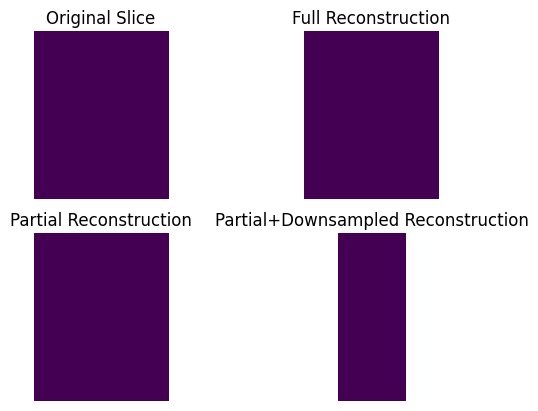

In [25]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,2, sharey=True)

axs[0, 0].imshow(np.rot90(X[:,15,:].double().squeeze()), vmin=1,vmax=3)
axs[0, 1].imshow(np.rot90(Xf[:,15,:].double().squeeze()), vmin=1,vmax=3)
axs[1, 0].imshow(np.rot90(Xslice.double().squeeze()), vmin=1,vmax=3)
axs[1, 1].imshow(np.rot90(Xds.double().squeeze()), vmin=1,vmax=3)

axs[0, 0].set_aspect(aspect='equal')
axs[0, 1].set_aspect(aspect='equal')
axs[1, 0].set_aspect(aspect='equal')
axs[1, 1].set_aspect(aspect='equal')

axs[0, 0].set_axis_off()
axs[0, 1].set_axis_off()
axs[1, 0].set_axis_off()
axs[1, 1].set_axis_off()

axs[0, 0].set_title('Original Slice')
axs[0, 1].set_title('Full Reconstruction')
axs[1, 0].set_title('Partial Reconstruction')
axs[1, 1].set_title('Partial+Downsampled Reconstruction')

axs[1, 1].set_xlim = axs[1, 0].get_xlim()
axs[1, 1].set_ylim = axs[1, 0].get_ylim()